In [2]:
import pandas as pd

df = pd.read_parquet("hf://datasets/bhadresh-savani/photo-to-cartoon/data/train-00000-of-00001-035009adcbbb5feb.parquet")

d:\HumanToCartoon_genAI\gen_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import pandas as pd

In [6]:
df.to_parquet('dataset.parquet')

In [2]:
df = pd.read_parquet('dataset.parquet')

In [3]:
import pandas as pd
import os
from PIL import Image
import io

# Load the dataset
df = pd.read_parquet("hf://datasets/bhadresh-savani/photo-to-cartoon/data/train-00000-of-00001-035009adcbbb5feb.parquet")

# Create directories for saving images
os.makedirs("original_images", exist_ok=True)
os.makedirs("cartoon_images", exist_ok=True)

# Process and save each image
for idx, row in df.iterrows():
    try:
        # Decode and save imageA (original)
        imageA_bytes = row['imageA']['bytes']
        imageA = Image.open(io.BytesIO(imageA_bytes))
        imageA.save(f"original_images/imageA_{idx}.png")

        # Decode and save imageB (cartoon)
        imageB_bytes = row['imageB']['bytes']
        imageB = Image.open(io.BytesIO(imageB_bytes))
        imageB.save(f"cartoon_images/imageB_{idx}.png")

        print(f"Processed and saved images for index {idx}")
    except Exception as e:
        print(f"Error processing index {idx}: {e}")

print("All images processed and saved!")


d:\HumanToCartoon_genAI\gen_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processed and saved images for index 0
Processed and saved images for index 1
Processed and saved images for index 2
Processed and saved images for index 3
Processed and saved images for index 4
Processed and saved images for index 5
Processed and saved images for index 6
Processed and saved images for index 7
Processed and saved images for index 8
Processed and saved images for index 9
Processed and saved images for index 10
Processed and saved images for index 11
Processed and saved images for index 12
Processed and saved images for index 13
Processed and saved images for index 14
Processed and saved images for index 15
Processed and saved images for index 16
Processed and saved images for index 17
Processed and saved images for index 18
Processed and saved images for index 19
Processed and saved images for index 20
Processed and saved images for index 21
Processed and saved images for index 22
Processed and saved images for index 23
Processed and saved images for index 24
Processed 

Data Loading and pre-process

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Directories for the dataset
original_dir = "original_images"
cartoon_dir = "cartoon_images"

# Image dimensions for resizing
IMG_SIZE = (256, 256)  # Adjust as required

# Helper function to load and preprocess images
def load_images(folder_path):
    images = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            # Open, resize, and normalize the image
            image = Image.open(file_path).convert('RGB').resize(IMG_SIZE)
            image = np.array(image) / 255.0  # Normalize to [0, 1]
            images.append(image)
        except Exception as e:
            print(f"Error loading image {file_name}: {e}")
    return np.array(images)

# Load both datasets
original_images = load_images(original_dir)
cartoon_images = load_images(cartoon_dir)

print(f"Loaded {len(original_images)} original images and {len(cartoon_images)} cartoon images.")


Loaded 76 original images and 76 cartoon images.


Showing sample

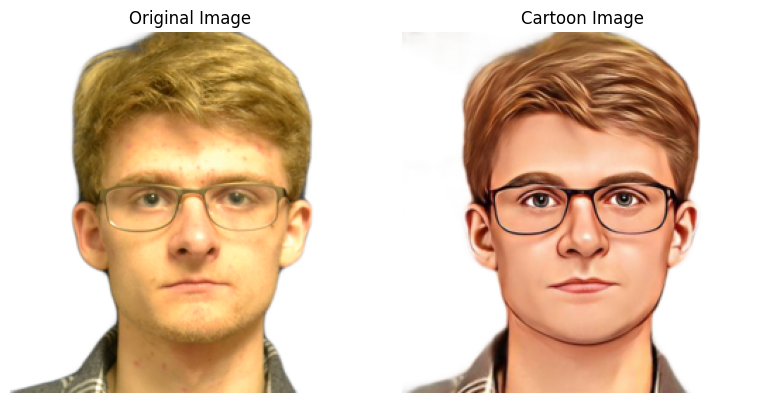

In [6]:
def show_sample(original, cartoon, index=0):
    plt.figure(figsize=(8, 4))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original[index])
    plt.title("Original Image")
    plt.axis("off")
    
    # Cartoon image
    plt.subplot(1, 2, 2)
    plt.imshow(cartoon[index])
    plt.title("Cartoon Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Show one sample
show_sample(original_images, cartoon_images)


Class-Balance

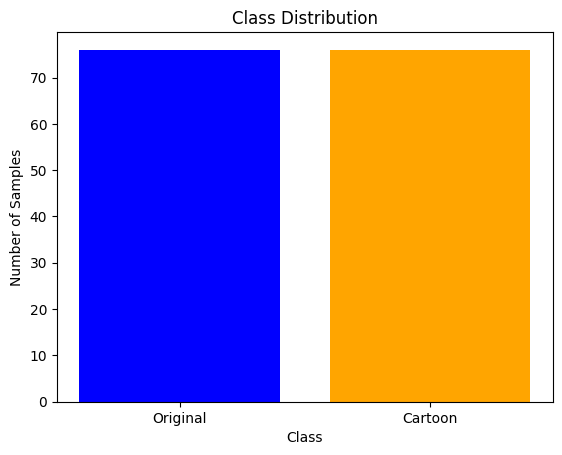

In [7]:
# Class labels
labels = ['Original', 'Cartoon']
counts = [len(original_images), len(cartoon_images)]

# Bar chart for class distribution
plt.bar(labels, counts, color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


PIx2PIx

In [13]:
import tensorflow as tf

# Preprocessing function for Pix2Pix
def preprocess_image(image):
    # Convert to float32 and scale from [0, 1] to [-1, 1]
    image = image * 2.0 - 1.0
    return image

# Function to prepare paired images for Pix2Pix
def preprocess_for_pix2pix(original_image, cartoon_image):
    # Resize both images to IMG_SIZE
    original_image = tf.image.resize(original_image, IMG_SIZE)
    cartoon_image = tf.image.resize(cartoon_image, IMG_SIZE)
    
    # Normalize the images
    original_image = preprocess_image(original_image)
    cartoon_image = preprocess_image(cartoon_image)
    
    return original_image, cartoon_image

# Prepare dataset for Pix2Pix
def prepare_pix2pix_data(original_images, cartoon_images):
    # Assuming both datasets have the same number of images
    assert len(original_images) == len(cartoon_images)
    
    # Create the paired dataset
    paired_images = []
    for i in range(len(original_images)):
        original_img = tf.convert_to_tensor(original_images[i], dtype=tf.float32)
        cartoon_img = tf.convert_to_tensor(cartoon_images[i], dtype=tf.float32)
        
        original_img, cartoon_img = preprocess_for_pix2pix(original_img, cartoon_img)
        paired_images.append((original_img, cartoon_img))
        
    return paired_images

# Load and preprocess the data for Pix2Pix
paired_data = prepare_pix2pix_data(original_images, cartoon_images)

# Check a sample pair
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow((paired_data[0][0] + 1) / 2)  # Convert from [-1, 1] back to [0, 1]
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow((paired_data[0][1] + 1) / 2)  # Convert from [-1, 1] back to [0, 1]
plt.title("Cartoon Image")
plt.show()


ModuleNotFoundError: No module named 'distutils'

Variational Auto-Encoder

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Hyperparameters
IMG_SIZE = 256  # Image size (256x256)
LATENT_DIM = 128  # Latent space dimensionality

# Encoder
def build_encoder():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    z_mean = layers.Dense(LATENT_DIM)(x)
    z_log_var = layers.Dense(LATENT_DIM)(x)
    encoder = models.Model(inputs, [z_mean, z_log_var], name='encoder')
    return encoder

# Sampling function: reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
    return z

# Decoder
def build_decoder():
    latent_inputs = layers.Input(shape=(LATENT_DIM,))
    x = layers.Dense(32 * 32 * 128, activation='relu')(latent_inputs)
    x = layers.Reshape((32, 32, 128))(x)
    x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
    decoder = models.Model(latent_inputs, outputs, name='decoder')
    return decoder

# VAE model
def build_vae():
    encoder = build_encoder()
    decoder = build_decoder()

    # Sampling layer
    z_mean, z_log_var = encoder.output
    z = layers.Lambda(sampling, output_shape=(LATENT_DIM,))([z_mean, z_log_var])

    # Generate output
    reconstructed_img = decoder(z)

    # VAE model
    vae = models.Model(encoder.input, reconstructed_img, name='vae')
    vae.add_loss(vae_loss(z_mean, z_log_var, reconstructed_img, encoder.input))
    vae.compile(optimizer='adam')
    return vae

# VAE loss function
def vae_loss(z_mean, z_log_var, reconstructed_img, original_img):
    # Reconstruction loss (Mean Squared Error)
    reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.mean_squared_error(original_img, reconstructed_img), axis=(1, 2)))

    # KL Divergence loss
    kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))

    return reconstruction_loss + kl_loss



ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Function to load and preprocess images
def load_and_preprocess_images(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
    return np.array(images)

# Load the cartoon dataset
cartoon_images = load_and_preprocess_images(cartoon_dir)

print(f"Loaded {len(cartoon_images)} cartoon images.")


ModuleNotFoundError: No module named 'distutils'

In [ ]:
# Build the VAE model
vae = build_vae()

# Train the VAE model
vae.fit(cartoon_images, cartoon_images, epochs=50, batch_size=32)

# Save the trained model
vae.save("vae_cartoon_model.h5")


In [ ]:
# Load the trained VAE model
vae = models.load_model("vae_cartoon_model.h5", custom_objects={'sampling': sampling, 'vae_loss': vae_loss})

# Use the encoder to sample a random latent vector
latent_sample = np.random.normal(size=(1, LATENT_DIM))

# Use the decoder to generate a new cartoon avatar
generated_avatar = vae.decoder(latent_sample)

# Display the generated image
plt.imshow(generated_avatar[0])
plt.axis('off')
plt.show()


Flask App

In [7]:
from flask import Flask, render_template, request, jsonify
from werkzeug.utils import secure_filename
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import io

# Initialize Flask App
app = Flask(__name__)

# Setup for storing uploaded files
UPLOAD_FOLDER = 'static/uploads'
PROCESSED_FOLDER = 'static/processed'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['PROCESSED_FOLDER'] = PROCESSED_FOLDER
app.config['ALLOWED_EXTENSIONS'] = {'png', 'jpg', 'jpeg'}

# Load the UNet model (we're assuming the model is trained and saved as 'unet_model.pth')
# The model is defined earlier; here we just load it
model = torch.load('unet_model.pth')  # Assuming the model is saved as 'unet_model.pth'
#model.eval()

# Helper function to check if the file is allowed
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in app.config['ALLOWED_EXTENSIONS']

# Route for homepage
@app.route('/')
def index():
    return render_template('index.html')

# Route for handling image upload and model processing
@app.route('/process_image', methods=['POST'])
def process_image():
    if 'image' not in request.files:
        return jsonify({'error': 'No image part'})

    image = request.files['image']
    
    if image.filename == '':
        return jsonify({'error': 'No selected file'})

    if image and allowed_file(image.filename):
        # Secure filename and save the image
        filename = secure_filename(image.filename)
        image_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        image.save(image_path)

        # Process the image using the selected model
        model_choice = int(request.form['model_choice'])  # Retrieve the model choice (1 = UNet, etc.)
        
        if model_choice == 1:  # UNet model
            processed_image_path = process_with_unet(image_path)

        # Return the processed image path for display
        return jsonify({'processed_image': processed_image_path})

    return jsonify({'error': 'Invalid file'})

# Function to process the image with UNet
def process_with_unet(image_path):
    # Open the image
    image = Image.open(image_path).convert('RGB')

    # Transform image (Resize and convert to tensor)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Pass through the model
    with torch.no_grad():
        output = model(image_tensor)  # Get model output
        output = output.squeeze().cpu().numpy()  # Remove batch dimension and move to CPU

    # Convert output to an image and save
    output_image = np.transpose(output, (1, 2, 0))  # Convert to HWC format
    output_image = (output_image * 255).astype(np.uint8)  # Rescale to [0, 255]
    
    processed_image_path = os.path.join(PROCESSED_FOLDER, os.path.basename(image_path))
    Image.fromarray(output_image).save(processed_image_path)

    return processed_image_path

if __name__ == '__main__':
    # Create folders if they don't exist
    os.makedirs(UPLOAD_FOLDER, exist_ok=True)
    os.makedirs(PROCESSED_FOLDER, exist_ok=True)
    
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


C:\Users\sohail\AppData\Local\Temp\ipykernel_6892\3196195031.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('unet_model.pth')  # Assuming the model 

In [5]:
%tb

SystemExit: 1